In [1]:
import numpy as np
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# 0 is the left terminal state
# 6 is the right terminal state
# 1 ... 5 represents A ... E
VALUES = np.zeros(7)
VALUES[1:6] = 0.5
# For convenience, we assume all rewards are 0
# and the left terminal state has value 0, the right terminal state has value 1
# This trick has been used in Gambler's Problem
VALUES[6] = 1

# set up true state values
TRUE_VALUE = np.zeros(7)
TRUE_VALUE[1:6] = np.arange(1, 6) / 6.0
TRUE_VALUE[6] = 1

ACTION_LEFT = 0
ACTION_RIGHT = 1

In [3]:
np.arange(1, 6)/6


array([0.16666667, 0.33333333, 0.5       , 0.66666667, 0.83333333])

In [4]:
print(VALUES)
print(TRUE_VALUE)


[0.  0.5 0.5 0.5 0.5 0.5 1. ]
[0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333
 1.        ]


In [5]:
def temporal_difference(values, alpha=0.1, batch=False):
    state = 3
    trajectory = [state]
    rewards = [0]
    while True:
        old_state = state
        if np.random.binomial(1, 0.5) == ACTION_LEFT:
            state -= 1
        else:
            state += 1
        # Assume all rewards are 0
        reward = 0
        trajectory.append(state)
        # TD update
        if not batch:
            values[old_state] += alpha * (reward + values[state] - values[old_state])
        if state == 6 or state == 0:
            break
        rewards.append(reward)
    return trajectory, rewards

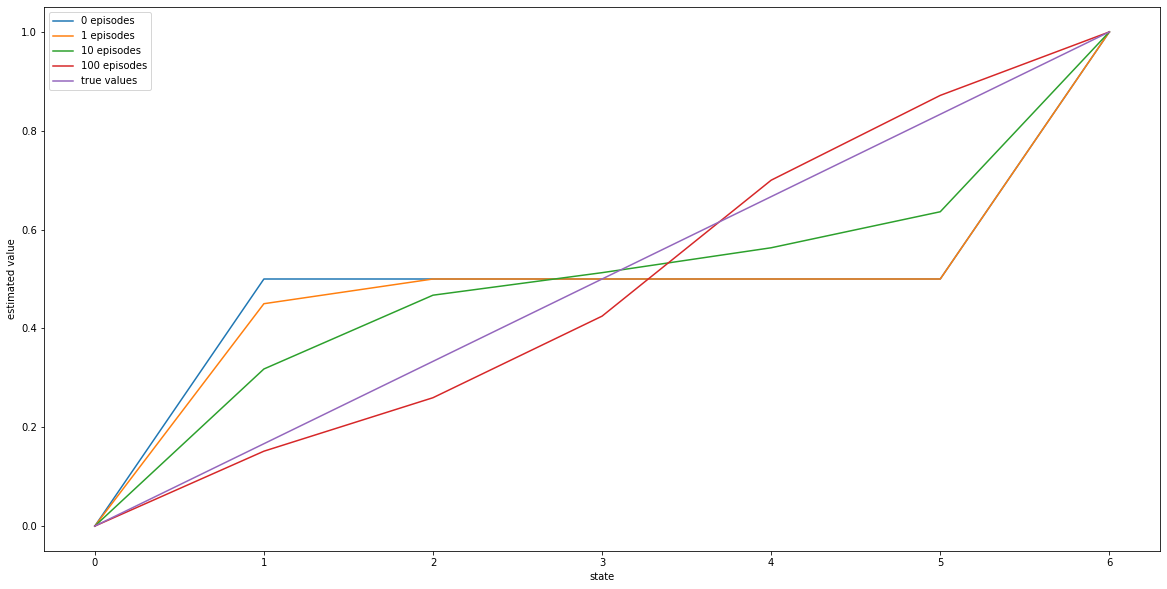

In [6]:
if __name__ == '__main__':

    plt.figure(figsize=(20, 10))
    #plt.subplot(2, 1, 1)
    #compute_state_value()
    ####################################
    ## aqui empieza TD
    episodes = [0, 1, 10, 100]
    current_values = np.copy(VALUES)
    #plt.figure(1)
    for i in range(episodes[-1] + 1):
        if i in episodes:
            plt.plot(current_values, label=str(i) + ' episodes')
        temporal_difference(current_values)
    plt.plot(TRUE_VALUE, label='true values')
    plt.xlabel('state')
    plt.ylabel('estimated value')
    plt.legend()


    #plt.subplot(2, 1, 2)
    #rms_error()
    #plt.tight_layout()
    plt.show()
    #plt.savefig('../images/example_6_2.png')
    plt.close()  